In [337]:
#Load up names.txt
words = open('names.txt', 'r').read().split('\n')

print(words[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [338]:
#Basic Bigram Model

#We want to count the frequency that each two char sequence occurs
freq = {}

for w in words[:]:
    chs = ['<S>'] + list(w) + ['<E>']
    #We want to get chars 1,2 then 2,3 then 3,4 ...
    for ch1, ch2 in zip(chs, chs[1:]): 
        # print(ch1, ch2)
        b = (ch1, ch2)

        freq[b] = freq.get(b, 0) + 1

In [339]:
#Print the most common bigrams
amount = 3
for b, f in sorted(freq.items(), key=lambda x: x[1], reverse=True)[:amount]:
    print(b, f)

('n', '<E>') 6763
('a', '<E>') 6640
('a', 'n') 5438


In [340]:
import torch

In [341]:
#Get a list of all the chars
chars = sorted(list(set(''.join(words))))
chars += ['<S>', '<E>']

#Tokenize the text- This will be used to convert the text to numbers
char_to_idx = {ch:i for i,ch in enumerate(chars)}
idx_to_char = {i:ch for i,ch in enumerate(chars)}

#Encode and Decode Functions for Strings
def encode(s):
    return [char_to_idx[ch] for ch in s]
def decode(l):
    return ''.join([idx_to_char[i] for i in l])

#Test
encodedText = encode("hello")
print(encodedText)
print(decode(encodedText))

#Note: This is a very simple tokenization method. There are better ways to do this. Example: Using tiktoken from OpenAI. (Sub-word tokenization = Don't need a new token for every letter)


[7, 4, 11, 11, 14]
hello


In [ ]:
#Get a list of all the chars
chars = sorted(list(set(''.join(words))))
chars += ['<S>', '<E>']

#Tokenize the text- This will be used to convert the text to numbers
char_to_idx = {ch:i for i,ch in enumerate(chars)}
idx_to_char = {i:ch for i,ch in enumerate(chars)}

#Encode and Decode Functions for Strings
def encode(s):
    return [char_to_idx[ch] for ch in s]
def decode(l):
    return ''.join([idx_to_char[i] for i in l])

#Test
encodedText = encode("hello")
print(encodedText)
print(decode(encodedText))

#Note: This is a very simple tokenization method. There are better ways to do this. Example: Using tiktoken from OpenAI. (Sub-word tokenization = Don't need a new token for every letter)


[7, 4, 11, 11, 14]
hello


In [342]:
#Basic Bigram Model

#We want to count the frequency that each two char sequence occurs
freq = {}

for w in words[:]:
    chs = ['<S>'] + list(w) + ['<E>']
    #We want to get chars 1,2 then 2,3 then 3,4 ...
    for ch1, ch2 in zip(chs, chs[1:]): 
        # print(ch1, ch2)
        # b = (ch1, ch2)
        #Convert to numbers
        b = (char_to_idx[ch1], char_to_idx[ch2])

        freq[b] = freq.get(b, 0) + 1

In [343]:
#Print the most common bigrams
amount = 3
for b, f in sorted(freq.items(), key=lambda x: x[1], reverse=True)[:amount]:
    print(b, f)
    

(13, 27) 6763
(0, 27) 6640
(0, 13) 5438


In [344]:
import plotly.graph_objs as go
import numpy as np

# Convert bigram frequencies to letter frequencies
freq_letters = {(idx_to_char[k[0]], idx_to_char[k[1]]): v for k,v in freq.items()}
# Get list of letters and their frequencies
letters = sorted(list(set([c for bigram in freq_letters.keys() for c in bigram])))
freqs = np.zeros((len(letters), len(letters)))
for i, c1 in enumerate(letters):
    for j, c2 in enumerate(letters):
        freqs[i,j] = freq_letters.get((c1,c2), 0)

# Create heatmap
fig = go.Figure(data=go.Heatmap(
                   z=freqs,
                   x=letters,
                   y=letters,
                   colorscale='Greens',
                   zmin=0,
                   zmax=np.max(freqs),
                   hovertemplate='Frequency: %{z}<extra></extra>'))
fig.update_layout(
    title='Bigram Frequency',
    xaxis_title='Second Letter',
    yaxis_title='First Letter',
    width=600,
    height=600,
)
fig.show()


In [345]:
freq_letters

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [346]:
#We want to do the same thing, but use tensors and have only one special character for the start and end of the word (.)

#Create new char to index and index to char dictionaries

chars = sorted(list(set(''.join(words))))

#Add "." to the beggining of the list
chars = ['.'] + chars

#Tokenize the text- This will be used to convert the text to numbers
char_to_idx = {ch:i for i,ch in enumerate(chars)}
idx_to_char = {i:ch for i,ch in enumerate(chars)}

In [347]:
#Create a tensor of the bigram frequencies
freq_tensor = torch.zeros(len(chars), len(chars))

for w in words[:]:
    chs = ['.'] + list(w) + ['.']
    #We want to get chars 1,2 then 2,3 then 3,4 ...
    for ch1, ch2 in zip(chs, chs[1:]): 
        # print(ch1, ch2)
        # b = (ch1, ch2)
        #Convert to numbers
        b = (char_to_idx[ch1], char_to_idx[ch2])

        freq_tensor[b[0], b[1]] += 1

In [348]:

# Get list of letters and their frequencies
letters = sorted(list(set(chars)))
freqs = freq_tensor.numpy()

# Create heatmap
fig = go.Figure(data=go.Heatmap(
                   z=freqs,
                   x=letters,
                   y=letters,
                   colorscale='Greens',
                   zmin=0,
                   zmax=np.max(freqs),
                   hovertemplate='Frequency: %{z}<extra></extra>'))
fig.update_layout(
    title='Bigram Frequency',
    xaxis_title='Second Letter',
    yaxis_title='First Letter',
    width=600,
    height=600,
)
fig.show()

In [349]:
#Create generator object 
g = torch.Generator().manual_seed(2147483647)

#Generate three random numbers and normalize them
p = torch.rand(3, generator=g)
p = p / p.sum()

#We want to create a list of 20 elements where each element is an index of p and their frequencies are based on the probabilities in p
torch.multinomial(p, 20, replacement=True, generator=g) #Ex. if p was [.7,.3] then the first index (0) would occur 70% of the time and the second index (1) would occur 30% of the time in the list of 20 elements

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [350]:
g = torch.Generator().manual_seed(2147483647)
#Convert to probabilities based on the first letter
p = freq_tensor[0] / freq_tensor[0].sum() 
#Generate a random letter based on the probabilities in p and a first letter
ix = torch.multinomial(p, 1, replacement=True, generator=g)

#Get the letter
idx_to_char[ix.item()]

'c'

In [351]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    ix = 0
    out = []
    while True:
        #Get the probabilities of the next letter based on the previous letter
        p = freq_tensor[ix]
        #Normalize the probabilities
        p = p / p.sum()

        # #Test- Create a uniform distribution
        # p = torch.ones(len(chars)) / len(chars)

        #Generate a random letter based on the probabilities in p and a first letter
        ix = torch.multinomial(p, 1, replacement=True, generator=g).item()
        #Get the letter
        out.append(idx_to_char[ix])
        if idx_to_char[ix] == '.':
            break

    print(''.join(out[:-1]))


cexze
momasurailezitynn
konimittain
llayn
ka
da
staiyaubrtthrigotai
moliellavo
ke
teda
ka
emimmsade
enkaviyny
ftlspihinivenvorhlasu
dsor
br
jol
pen
aisan
ja


In [352]:
#Create a prob_tensor with the probabilities so we dont have to keep calculating them
prob_tensor = (freq_tensor+1) / (freq_tensor+1).sum(dim=1, keepdim=True)
print(prob_tensor[0].sum())

tensor(1.)


In [353]:
log_likelihood = 0
n = 0
for w in words[:]:
    chs = ['.'] + list(w) + ['.']
    #We want to get chars 1,2 then 2,3 then 3,4 ...
    for ch1, ch2 in zip(chs, chs[1:]):
        # print(ch1, ch2)
        # b = (ch1, ch2)
        #Convert to numbers
        b = (char_to_idx[ch1], char_to_idx[ch2])

        prob = prob_tensor[b[0], b[1]]
        log_prob = torch.log(prob)

        log_likelihood += log_prob
        n += 1

        # print(f'{ch1} -> {ch2}: {prob:.4f} {log_prob:.4f}')

        freq_tensor[b[0], b[1]] += 1

log_likelihood /= -n
print(f'Log Likelihood: {log_likelihood:.4f}')

Log Likelihood: 2.4544


In [446]:
xs, ys = [], [] #xs are the inputs and ys are the targets

for w in words[:]:
# for w in ["bob"]:
    chs = ['.'] + list(w) + ['.']
    #We want to get chars 1,2 then 2,3 then 3,4 ...
    for ch1, ch2 in zip(chs, chs[1:]):
        # print(ch1, ch2)
        # b = (ch1, ch2)
        #Convert to numbers
        b = (char_to_idx[ch1], char_to_idx[ch2])

        xs.append(b[0])
        ys.append(b[1])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(xs)
print(ys)

tensor([ 0,  5, 13,  ..., 25, 26, 24])
tensor([ 5, 13, 13,  ..., 26, 24,  0])


In [355]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

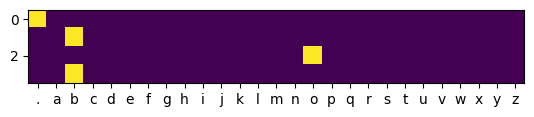

In [356]:
x_enc = F.one_hot(xs, num_classes=len(chars)).float() 
plt.imshow(x_enc)

#Convert the x axis to letters
plt.xticks(range(len(chars)), labels=chars)
plt.show()


In [357]:
print(x_enc) 

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [447]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn(len(chars), len(chars), requires_grad=True, generator=g) #Initialize the weights randomly

logits = x_enc @ W #Log Counts

#Softmax - Convert to probabilities
counts = torch.exp(logits) #Counts
probs = counts / counts.sum(dim=1, keepdim=True) #Probabilities
probs

#Print shape of probs
probs.shape

torch.Size([4, 27])

In [384]:
#For the first character "." what is the probability of the next character being the correct character ("b")

#Get correct character
ch = ys[0].item()
print("Correct Character: ", idx_to_char[ch])

#Get probability of the correct character
prob = probs[0, ch]
print("Probability of Correct Character: ", prob.item()) 

#Right now it's really low because we haven't trained the model yet. 

#Let's calculate loss for this example 
loss = -torch.log(prob)
print("Loss: ", loss.item())

Correct Character:  b
Probability of Correct Character:  0.012314035557210445
Loss:  4.397015571594238


In [449]:
#Forward Pass
print(probs[0, ys[0]], probs[1, ys[1]], probs[2, ys[2]])

#How do we automate this process?
print(probs[torch.arange(len(xs)), ys]) #This is the same as the above

tensor(0.0123, grad_fn=<SelectBackward0>) tensor(0.1814, grad_fn=<SelectBackward0>) tensor(0.0309, grad_fn=<SelectBackward0>)


IndexError: index 114076 is out of bounds for dimension 0 with size 4

In [438]:
#Redo the calc for probs
probs = torch.exp(x_enc @ W) / torch.exp(x_enc @ W).sum(dim=1, keepdim=True)

#Let's calculate the loss 
loss = -torch.log(probs[torch.arange(len(xs)), ys]).mean()
print("Loss: ", loss.item())

Loss:  3.459641456604004


In [439]:
#Backward Pass
W.grad = None #Sets the gradient to zero
loss.backward() #Calculates the gradients

In [440]:
#Update the weights based on the gradients
W.data -= 0.3 * W.grad.data

In [454]:
x_enc = F.one_hot(xs, num_classes=len(chars)).float() 
g = torch.Generator().manual_seed(2147483647)
W = torch.randn(len(chars), len(chars), requires_grad=True, generator=g)

In [463]:
#Putting it all together
#Gradient Descent
for i in range(1000):
    #Forward Pass
    logits = x_enc @ W #Log Counts
    probs = torch.exp(logits) / torch.exp(logits).sum(dim=1, keepdim=True) #Probabilities
    loss = -torch.log(probs[torch.arange(len(xs)), ys]).mean() #Calculate loss

    #Backward Pass
    W.grad = None #Sets the gradient to zero
    loss.backward() #Calculates the gradients

    #Update the weights based on the gradients
    W.data -= 20 * W.grad.data

    if i % 100 == 0:
        print(f'Loss: {loss:.4f}')

Loss: 2.4580
Loss: 2.4575
Loss: 2.4572
Loss: 2.4569
Loss: 2.4567
Loss: 2.4565
Loss: 2.4563
Loss: 2.4561
Loss: 2.4560
Loss: 2.4559


In [469]:
#Get the prob of .b
NN_Prob = torch.exp(W[0,1]) / torch.exp(W[0]).sum() #Prob of .b from the neural network
Basic_Prob = freq_tensor[0,1] / freq_tensor[0].sum() #Prob of .b from the basic model
print("Neural Network Prob: ", prob.item())
print("Basic Prob: ", Basic_Prob.item())

Neural Network Prob:  0.13766393065452576
Basic Prob:  0.13767053186893463


In [475]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    ix = 0
    out = []
    while True:
        #Get the probabilities of the next letter based on the previous letter
        p = torch.exp(W[ix]) / torch.exp(W[ix]).sum()

        #Generate a random letter based on the probabilities in p and a first letter
        ix = torch.multinomial(p, 1, replacement=True, generator=g).item()
        #Get the letter
        out.append(idx_to_char[ix])
        if idx_to_char[ix] == '.':
            break

    print(''.join(out[:-1]))

cexze
momasurailezitynn
konimittain
llayn
ka
da
staiyaubrtthrigotai
moliellavo
ke
teda
ka
emimmsade
enkaviyny
fobspihinivenvorhlasu
dsor
br
jol
pen
aisan
ja
